<a href="https://colab.research.google.com/github/akashhhhh02/Customer-Churn-Prediction-and-Risk-Analysis-Engine/blob/main/Customer_Churn_Prediction_and_Risk_Analysis_Engine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Churn Prediction and Risk Analysis Engine

## Telecom Customer Attrition Modeling using Statistical Analysis and Machine Learning

## Problem Statement

Telecom companies face significant revenue loss due to customer churn.
The objective of this project is to build a machine learning system
to predict customers likely to churn and assign a risk score to enable proactive retention strategies.

## Objectives

- Perform statistical analysis to identify churn drivers  
- Handle imbalanced customer data  
- Build a Logistic Regression model for churn prediction  
- Evaluate performance using ROC-AUC, Precision, Recall, and F1-Score  
- Develop a business-friendly risk scoring system  

## Step 1: Import the necessary libraries
- Numpy: Used for efficient numerical computations, array handling, and supporting mathematical operations required for model training and prediction.
- Pandas: Used for data loading, cleaning, preprocessing, encoding categorical variables, and manipulating the dataset for analysis and model training.
- Matplotlib: Used to visualize model performance, especially for plotting the ROC curve and analyzing prediction results.
- Seaborn: Used for statistical data visualization, such as plotting class distribution and exploring relationships between features and churn.

### sklearn:
Scikit-learn (AKA sklearn) is used to perform data splitting, feature scaling, model training, and evaluation using machine learning algorithms and performance metrics.

- model_selection.train_test_split: Used to split the dataset into training and testing sets to evaluate model performance reliably.
- preprocessing.StandardScaler: Used to normalize feature values so that all variables are on the same scale, improving model performance and stability.
- linear_model.LogisticRegression: Used to build an interpretable classification model that predicts the probability of customer churn.
- metrics: Used to evaluate model performance using metrics such as Confusion Matrix, Precision, Recall, F1-Score, and ROC-AUC.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

## Step 2: Import the Dataset

## Dataset Description

The dataset contains telecom customer information including:

- Demographics (Gender, Senior Citizen, Partner, Dependents)
- Account Information (Tenure, Contract Type, Payment Method)
- Service Details (Internet, Phone Service, Billing)
- Monthly and Total Charges
- Target Variable: Churn (Yes/No)

The dataset is slightly imbalanced with more non-churn customers.

In [2]:
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Step 3: Data cleaning

Data cleaning involves handling missing values, correcting data types, removing irrelevant columns, and ensuring the dataset is properly formatted for analysis and model training.

In [3]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df.dropna(inplace=True)
df.drop("customerID", axis=1, inplace=True)

df["Churn"] = df["Churn"].map({"Yes":1, "No":0})

## Step 4: Check for Class Imbalance

The dataset is imbalanced, with significantly more non-churn customers than churn customers, which can bias the model.  
To address this, class weighting is used in Logistic Regression to ensure fair learning from both classes.

In [4]:
print(df["Churn"].value_counts())
print(df["Churn"].value_counts(normalize=True))

Churn
0    5163
1    1869
Name: count, dtype: int64
Churn
0    0.734215
1    0.265785
Name: proportion, dtype: float64


## Step 5: Encode Categorical Variables

Categorical variables are converted into numerical format using one-hot encoding to make them suitable for machine learning algorithms.

In [6]:
df = pd.get_dummies(df, drop_first=True)

print(df.dtypes[df.dtypes == "object"])

Series([], dtype: object)


## Step 6: Train Test Split

The dataset is divided into training and testing sets to train the model on one portion of the data and evaluate its performance on unseen data.

In [7]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## Step 7: Feature Scaling

Feature scaling is applied using StandardScaler to standardize numerical features so that all variables contribute equally to model training.

In [8]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Step 8: Logistic Regression

Logistic Regression is trained with class weighting to handle class imbalance, ensuring the model fairly learns patterns from both churn and non-churn customers.

In [9]:
log_model = LogisticRegression(
    max_iter=2000,
    class_weight='balanced'
)

log_model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=2000)

## Step 9: Model Evaluation
### Model Evaluation Metrics

The model performance is evaluated using:

- Confusion Matrix
- Precision
- Recall
- F1-Score
- ROC-AUC Score

ROC-AUC measures the model's ability to distinguish between churn and non-churn customers.


In [10]:
y_pred = log_model.predict(X_test)
y_prob = log_model.predict_proba(X_test)[:,1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

[[733 300]
 [ 78 296]]
              precision    recall  f1-score   support

           0       0.90      0.71      0.80      1033
           1       0.50      0.79      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.80      0.73      0.75      1407

ROC-AUC: 0.8316284535463399


## Step 10: ROC Curve

The ROC Curve visualizes the model’s ability to distinguish between churn and non-churn customers by plotting the True Positive Rate against the False Positive Rate.

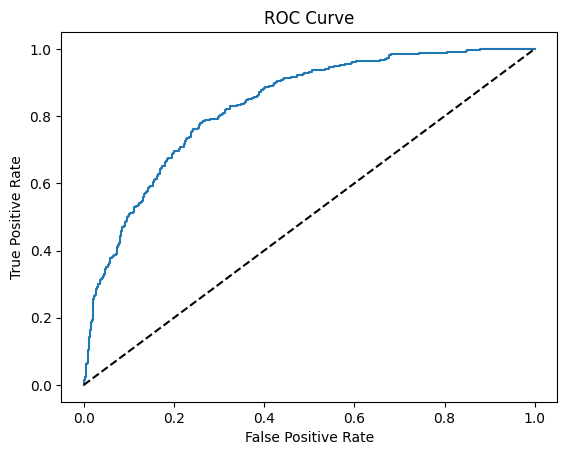

In [11]:
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr)
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

## Step 11: Risk Score Function
The predicted churn probability is converted into a business-friendly risk score (0–100).

Risk Categories:
- Low Risk: < 40%
- Medium Risk: 40% – 60%
- High Risk: > 60%

This allows business teams to prioritize retention strategies effectively.

In [12]:
def churn_risk_score(input_data):

    new_df = pd.DataFrame([input_data])
    new_df = new_df.reindex(columns=X.columns, fill_value=0)

    new_df_scaled = scaler.transform(new_df)

    probability = log_model.predict_proba(new_df_scaled)[:,1][0]

    risk_score = round(probability * 100, 2)

    if risk_score < 40:
        category = "Low Risk"
    elif risk_score < 60:
        category = "Medium Risk"
    else:
        category = "High Risk"


    return risk_score, category

## Step 12: Real time data testing

In [13]:
sample1 = {
    'SeniorCitizen': 1,
    'tenure': 1,
    'MonthlyCharges': 95,
    'TotalCharges': 95,
    'gender_Male': 1,
    'Partner_Yes': 0,
    'Dependents_Yes': 0,
    'PhoneService_Yes': 1,
    'PaperlessBilling_Yes': 1,
    'Contract_One year': 0,
    'Contract_Two year': 0,
    'PaymentMethod_Electronic check': 1
}

score, category = churn_risk_score(sample1)
print(score, category)

45.94 Medium Risk


In [14]:
sample2 = {
    'SeniorCitizen': 1,
    'tenure': 0,
    'MonthlyCharges': 110,
    'TotalCharges': 110,
    'gender_Male': 1,
    'Partner_Yes': 0,
    'Dependents_Yes': 0,
    'PhoneService_Yes': 1,
    'PaperlessBilling_Yes': 1,
    'Contract_One year': 0,
    'Contract_Two year': 0,
    'PaymentMethod_Electronic check': 1
}
score, category = churn_risk_score(sample2)
print(score, category)

36.9 Low Risk


In [15]:
sample3 = {
    'SeniorCitizen': 1,
    'tenure': 0,
    'MonthlyCharges': 120,
    'TotalCharges': 120,
    'gender_Male': 1,
    'Partner_Yes': 0,
    'Dependents_Yes': 0,
    'PhoneService_Yes': 1,
    'PaperlessBilling_Yes': 1,
    'Contract_One year': 0,
    'Contract_Two year': 0,
    'InternetService_Fiber optic': 1,
    'PaymentMethod_Electronic check': 1
}
score, category = churn_risk_score(sample3)
print(score, category)

65.83 High Risk


## Conclusion

The project successfully identifies key churn drivers and predicts customer attrition
using an interpretable machine learning model.

The risk scoring engine enables proactive decision-making and improves
customer retention strategy planning.